# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
#pip install nltk

In [2]:
#pip install wordcloud

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This was our first flight wi...
1,✅ Trip Verified | I recently encountered a hig...
2,Not Verified | Beware! BA don't provide any r...
3,✅ Trip Verified | Check in was chaotic and ba...
4,Not Verified | All 4 of our flights were fine ...


In [6]:
directory_path = 'data'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

reviews    0
dtype: int64

In [9]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '').str.replace('cNot Verified |','').str.replace('Not Verified |','')

In [10]:
df.head()

,reviews
0,This was our first flight with British Airway...
1,I recently encountered a highly disappointing...
2,Beware! BA don't provide any refund due to a...
3,Check in was chaotic and badly organised. Ev...
4,All 4 of our flights were fine in terms of co...


In [11]:
df['reviews'] = df['reviews'].str.lower()

In [12]:
df['reviews'] = df['reviews'].str.replace('[^\w\s]', '')

In [13]:
df.head()

,reviews
0,this was our first flight with british airway...
1,i recently encountered a highly disappointing...
2,beware! ba don't provide any refund due to a...
3,check in was chaotic and badly organised. ev...
4,all 4 of our flights were fine in terms of co...


In [14]:
df.loc[:,'Sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment 
df.loc[:,'SentimentCategory'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the result
df[['reviews', 'Sentiment', 'SentimentCategory']]

,reviews,Sentiment,SentimentCategory
0,this was our first flight with british airway...,0.273438,Positive
1,i recently encountered a highly disappointing...,-0.084226,Negative
2,beware! ba don't provide any refund due to a...,-0.061589,Negative
3,check in was chaotic and badly organised. ev...,0.093740,Positive
4,all 4 of our flights were fine in terms of co...,0.031410,Positive
...,...,...,...
995,london heathrow to paris cdg. quick and easy...,0.156190,Positive
996,johannesburg to london. at johannesburg used...,0.103936,Positive
997,edinburgh to bangalore via heathrow. rude sta...,-0.114103,Negative
998,\r\nberlin to johannesburg via london. the s...,0.151429,Positive


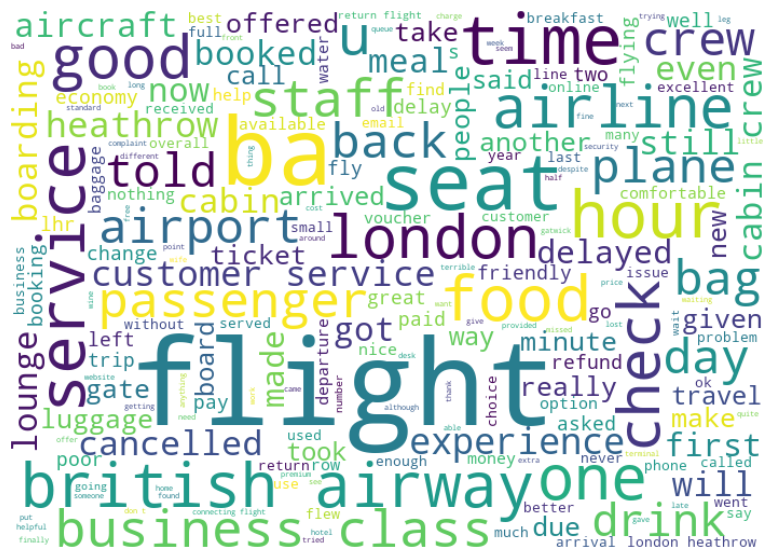

In [15]:
wordcloud = WordCloud(width=700, height=500, background_color='white',random_state=21, max_font_size=110).generate(' '.join(df['reviews']))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

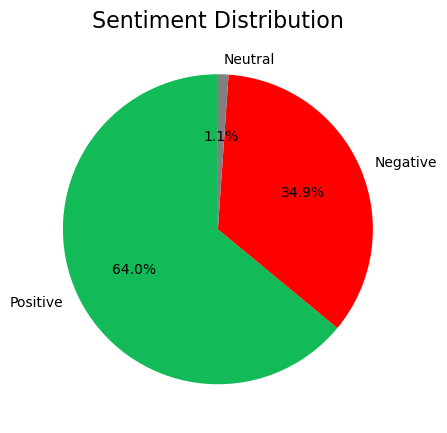

In [16]:
sentiment_counts = df['SentimentCategory'].value_counts()

plt.figure(figsize=(5, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#12bb58', 'red', 'gray'])
plt.title('Sentiment Distribution',fontsize = 16)
plt.show()